In [26]:
import pandas as np
import numpy as np1 
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn import svm, datasets, metrics

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

In [43]:
def normalize(data, cat) :
    data[cat]= ((data[cat]-data[cat].min())/ (data[cat].max()-data[cat].min()))

In [44]:
def perf_measure(y_actual, y_hat):
    y_ac = y_hat.copy()
    acc = 0
    for i in y_actual.keys() :
        y_ac[acc] = y_actual[i]
        acc += 1
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_ac[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_ac[i]!=y_hat[i]:
           FP += 1
        if y_ac[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_ac[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [45]:
df = np.read_csv("educnorma.csv",index_col=0)
df2 = np.read_csv("education.csv")

In [46]:
y = df2["Performance in online"].copy()

df.drop(["performance_online"],axis=1,inplace=True)

In [7]:
def prepa(y):
    for i in y.keys() :
        if y[i] < 7: y[i]= 0
        else : y[i]=1

def prepa2(y):
    for i in range (len(y)) :
        if y[i] < 7: y[i]= 0
        else : y[i]=1

In [8]:
import math
from random import seed, shuffle
SEED = 1122334455
seed(SEED)
np1.random.seed(SEED)

def reapeated_random(n_iter,df_1) :
    X = df_1.to_numpy(copy=True)
    y1 = y.to_numpy(copy=True)   
    matrise_result=[] # dim 1 -> interation 
                     # dim 2 -> 0: training ; 2:validation
    param_grid = {
    "C": loguniform(1e2, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
    }
    for i in range (n_iter) :
        print(i,end='')
        n_size=np1.shape(X)[0]
        perm = list(range(0,n_size))
        shuffle(perm)
        X_syn1 = X[perm]
        y_syn1 = y[perm]
        #Generate training, testing and validation:
        n_train=int(0.7*n_size)
        n = np1.shape(X_syn1)[0]
        X_training=X_syn1[0:n_train,:]
        y_training=y_syn1[0:n_train]

        X_validation=X_syn1[(math.floor((n-n_train))):n,:]
        y_validation=y_syn1[(math.floor((n-n_train))):n]
        #resolution
        clf = RandomizedSearchCV(
            SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
        )
        clf = clf.fit(X_training,y_training)
        y_pred_training=clf.predict(X_training) 
        y_pred_validation=clf.predict(X_validation)
        
        prepa2(y_pred_training)
        y_training2 = y_training.copy()
        prepa(y_training2)
        prepa2(y_pred_validation)
        y_validation2 = y_validation.copy()
        prepa(y_validation2)

        Accuracy_training=(metrics.accuracy_score(y_training2, y_pred_training)*100)
        Accuracy_validation=(metrics.accuracy_score(y_validation2, y_pred_validation)*100)   
        
        matrise_result += [[Accuracy_training,Accuracy_validation,clf.best_estimator_]]
    return matrise_result



In [9]:
def final_accuracy(matrice):
    Final_accuracy = []
    for i in range (len(matrice)):
        Final_accuracy += [matrice[i][1]]
    print("La précision moyenne est  %.2f" %np1.mean(Final_accuracy))
    print("La variance de précision est %.2f" %np1.var(Final_accuracy))

def liste_parametre(matrice):
    liste_C = []
    liste_gamma = []
    for i in range (len(matrice)):
        liste_C += [matrice[i][2].C]
        liste_gamma += [matrice[i][2].gamma]
    return liste_C,liste_gamma

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1033 non-null   float64
 1   nb_subjets                    1033 non-null   float64
 2   Family_size                   1033 non-null   float64
 3   Internet                      1033 non-null   float64
 4   Study                         1033 non-null   float64
 5   Sleep                         1033 non-null   float64
 6   Media                         1033 non-null   float64
 7   Note_avant                    1033 non-null   float64
 8   Online_mode                   1033 non-null   float64
 9   doubts_online                 1033 non-null   float64
 10  Gender_Male                   1033 non-null   int64  
 11  Home_location_Urban           1033 non-null   int64  
 12  Education_Post Graduate       1033 non-null   int64  
 13  Edu

In [10]:
matrice = np1.array(reapeated_random(10,df))
print('')
final_accuracy(matrice)

0123456789
La précision moyenne est  79.49
La variance de précision est 5.76


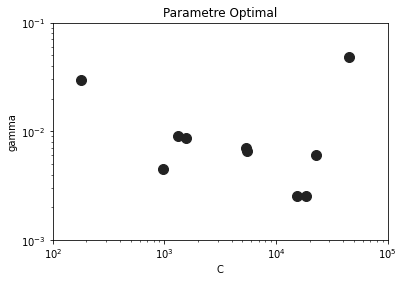

In [11]:
a,b= liste_parametre(matrice)
fig = plt.figure(figsize=(6,4))
plt.scatter(a, b , color='#222222', marker='o', s = 100)

plt.yscale("log") ; plt.xscale("log")
plt.xlabel("C") ; plt.ylabel("gamma") ;plt.title("Parametre Optimal")
plt.ylim(0.001,0.1) ; plt.xlim(100,100000)

plt.show()

In [12]:
def liste_C(matrice):
    liste_C = []
    liste_précision = []
    for i in range (len(matrice)):
        liste_C += [matrice[i][2].C]
        liste_précision += [matrice[i][1]]
    return liste_C,liste_précision

def liste_gamma(matrice):
    liste_gamma = []
    liste_précision = []
    for i in range (len(matrice)):
        liste_gamma += [matrice[i][2].gamma]
        liste_précision += [matrice[i][1]]
    return liste_gamma,liste_précision

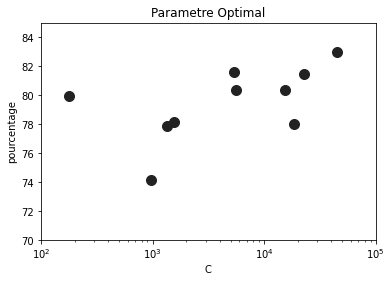

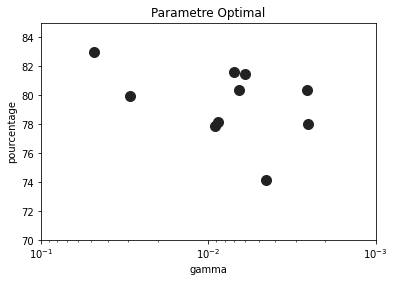

In [14]:
a,b= liste_C(matrice)
fig = plt.figure(figsize=(6,4))
plt.scatter(a, b , color='#222222', marker='o', s = 100)

plt.xscale("log")
plt.xlabel("C") ; plt.ylabel("pourcentage") ;plt.title("Parametre Optimal")
plt.ylim(70,85) ; plt.xlim(100,100000)

plt.show()

a,b= liste_gamma(matrice)
fig = plt.figure(figsize=(6,4))
plt.scatter(a, b , color='#222222', marker='o', s = 100)

plt.xscale("log")
plt.xlabel("gamma") ; plt.ylabel("pourcentage") ;plt.title("Parametre Optimal")
plt.ylim(70,85) ; plt.xlim(0.1,0.001)

plt.show()

In [16]:
df_2 = df[["Study","Sleep","Media","Note_avant"]].copy()
matrice = np1.array(reapeated_random(10,df_2))
print('')
final_accuracy(matrice)

0123456789
La précision moyenne est  56.49
La variance de précision est 3.20


In [47]:
df.drop([ "nb_subjets" , "Sleep", "Note_avant","Home_location_Urban","Education_Post Graduate","Education_School" \
           ,"Education_Under Graduate","Economic_status_Middle Class","Economic_status_Poor","Economic_status_Rich", \
           "Sport_Yes", "Gaming_Yes","interest_Both"],axis=1,inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1033 non-null   float64
 1   Family_size                  1033 non-null   float64
 2   Internet                     1033 non-null   float64
 3   Study                        1033 non-null   float64
 4   Media                        1033 non-null   float64
 5   Online_mode                  1033 non-null   float64
 6   doubts_online                1033 non-null   float64
 7   Gender_Male                  1033 non-null   int64  
 8   Device_used_Desktop          1033 non-null   int64  
 9   Device_used_Laptop           1033 non-null   int64  
 10  Device_used_Mobile           1033 non-null   int64  
 11  Monitoring_Yes               1033 non-null   int64  
 12  separate_room_Yes            1033 non-null   int64  
 13  group_study_yes   

In [18]:
matrice = np1.array(reapeated_random(10,df))
print('')
final_accuracy(matrice)

0123456789
La précision moyenne est  74.90
La variance de précision est 29.67


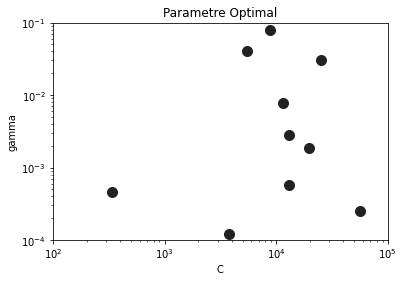

In [19]:
a,b= liste_parametre(matrice)
fig = plt.figure(figsize=(6,4))
plt.scatter(a, b , color='#222222', marker='o', s = 100)

plt.yscale("log") ; plt.xscale("log")
plt.xlabel("C") ; plt.ylabel("gamma") ;plt.title("Parametre Optimal")
plt.ylim(0.0001,0.1) ; plt.xlim(100,100000)

plt.show()

In [48]:
df.drop(["group_study_yes","separate_room_Yes","Monitoring_Yes","Gender_Male", "Family_size", "Media","Device_used_Laptop" \
           ,"Device_used_Mobile","interest_Practical","interest_Theory","Device_used_Desktop"],axis=1,inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          1033 non-null   float64
 1   Internet                     1033 non-null   float64
 2   Study                        1033 non-null   float64
 3   Online_mode                  1033 non-null   float64
 4   doubts_online                1033 non-null   float64
 5   Satisfaction_online_Average  1033 non-null   int64  
 6   Satisfaction_online_Bad      1033 non-null   int64  
 7   Satisfaction_online_Good     1033 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 72.6 KB


In [49]:
matrice = np1.array(reapeated_random(10,df))
print('')
final_accuracy(matrice)

0123456789
La précision moyenne est  70.18
La variance de précision est 1.74


In [36]:
df.drop(["Age","Study","Satisfaction_online_Average"],axis=1,inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Internet                  1033 non-null   float64
 1   Online_mode               1033 non-null   float64
 2   doubts_online             1033 non-null   float64
 3   Satisfaction_online_Bad   1033 non-null   int64  
 4   Satisfaction_online_Good  1033 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 48.4 KB


In [22]:
matrice = np1.array(reapeated_random(10,df))
print('')
final_accuracy(matrice)

0123456789
La précision moyenne est  70.33
La variance de précision est 0.97


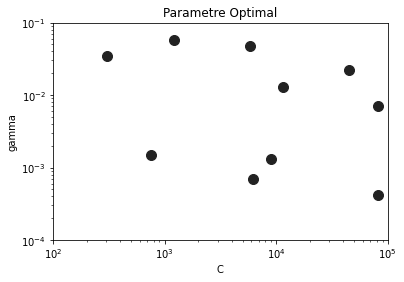

In [23]:
a,b= liste_parametre(matrice)
fig = plt.figure(figsize=(6,4))
plt.scatter(a, b , color='#222222', marker='o', s = 100)

plt.yscale("log") ; plt.xscale("log")
plt.xlabel("C") ; plt.ylabel("gamma") ;plt.title("Parametre Optimal")
plt.ylim(0.0001,0.1) ; plt.xlim(100,100000)

plt.show()

In [38]:
df.drop(["Online_mode","Satisfaction_online_Bad","Satisfaction_online_Good"],axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1033 entries, 0 to 1032
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Internet       1033 non-null   float64
 1   doubts_online  1033 non-null   float64
dtypes: float64(2)
memory usage: 24.2 KB


In [25]:
matrice = np1.array(reapeated_random(10,df))
print('')
final_accuracy(matrice)

0123456789
La précision moyenne est  69.02
La variance de précision est 0.64
